In [29]:
from configs.config import get_path

import src.utils.nervousness_comparator as nerv_comparator
import src.utils.plotter_proof as proof
import src.utils.calc as calc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 26)

In [30]:
data_path = get_path("data", "cp_lateness")

def get_file_path(prefix: str = "", text: str = "schedule"):
    return data_path / f"{prefix}_{text}.csv"

In [31]:
day_numb = 1

file = get_file_path(prefix="02", text=f"plan_{day_numb:02d}_init")

df_plan_init =  pd.read_csv(file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_000,0,M0,0,2297,1440,29,1469,-828,0,828
1,Job_000,1,M1,0,2297,1486,78,1564,-733,0,733
2,Job_000,2,M2,0,2297,1636,9,1645,-652,0,652
3,Job_000,3,M3,0,2297,1645,36,1681,-616,0,616
4,Job_000,4,M4,0,2297,1681,49,1730,-567,0,567
...,...,...,...,...,...,...,...,...,...,...,...
315,Job_031,5,M1,1424,4390,3081,28,3109,-1281,0,1281
316,Job_031,6,M6,1424,4390,3291,46,3337,-1053,0,1053
317,Job_031,7,M5,1424,4390,3337,46,3383,-1007,0,1007
318,Job_031,8,M7,1424,4390,3723,72,3795,-595,0,595


In [32]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,M9,0,2297,2276,21,2297,0,0,0
19,Job_001,9,M8,81,3047,3017,30,3047,0,0,0
29,Job_002,9,M4,101,3404,3371,33,3404,0,0,0
39,Job_003,9,M5,142,3950,3907,43,3950,0,0,0
49,Job_004,9,M6,177,2462,2409,53,2462,0,0,0


In [33]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(2, last_planning_start + 1):
        file = get_file_path(prefix=schedule_prefix, text=f"schedule_{day_numb:02d}")
        df_plan_temp = pd.read_csv(file)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [34]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [35]:
append_plans_and_last_ops("04_devpen", last_planning_start = 7,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [36]:
df_plan_devpen_last_ops_list[0]

,Job,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,M9,0,2297,2276,21,2297,0,0,0
19,Job_001,9,M8,81,3047,3017,30,3047,0,0,0
29,Job_002,9,M4,101,3404,3371,33,3404,0,0,0
39,Job_003,9,M5,142,3950,3907,43,3950,0,0,0
49,Job_004,9,M6,177,2462,2409,53,2462,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279,Job_027,9,M3,1390,4524,4445,79,4524,0,0,0
289,Job_028,9,M9,1391,3688,3667,21,3688,0,0,0
299,Job_029,9,M6,1410,3696,3643,53,3696,0,0,0
309,Job_030,9,M9,1423,3720,3699,21,3720,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [37]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [38]:
append_plans_and_last_ops("03_simple", last_planning_start = 7,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [39]:
df_plan_simple_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
2,Job_103,9,6466,10275,M5,10356,43,10399,124,124,0
8,Job_108,9,6886,10358,M8,10525,74,10599,241,241,0
9,Job_109,9,6909,10049,M7,10164,45,10209,160,160,0
11,Job_112,9,7055,10196,M7,10214,45,10259,63,63,0
12,Job_114,9,7124,10009,M7,10139,25,10164,155,155,0
...,...,...,...,...,...,...,...,...,...,...,...
353,Job_155,9,9551,12436,M7,12449,25,12474,38,38,0
363,Job_156,9,9675,12094,M4,12116,55,12171,77,77,0
373,Job_157,9,9680,12814,M3,12735,79,12814,0,0,0
383,Job_158,9,9747,13219,M8,13145,74,13219,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

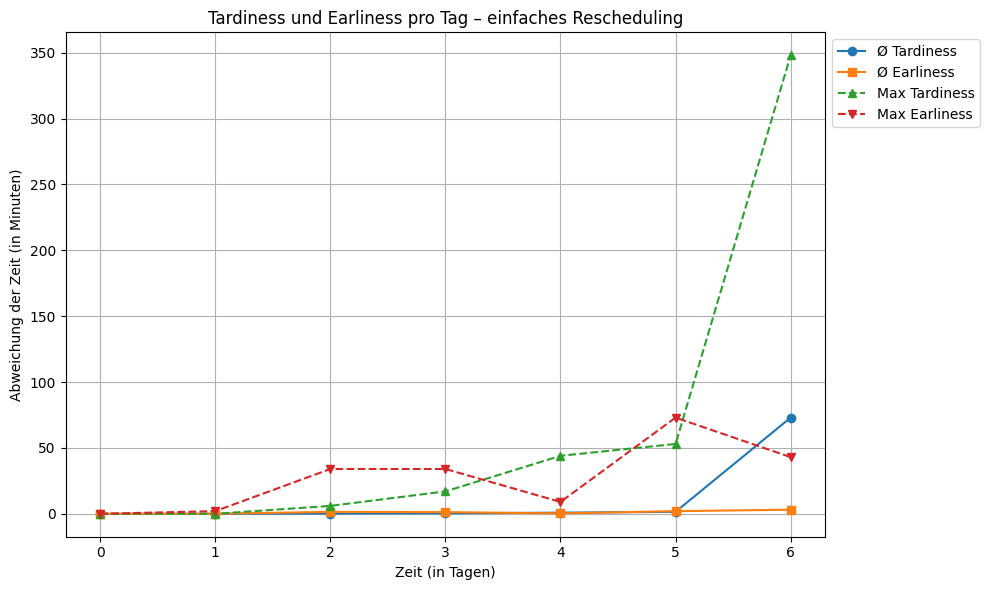

In [40]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


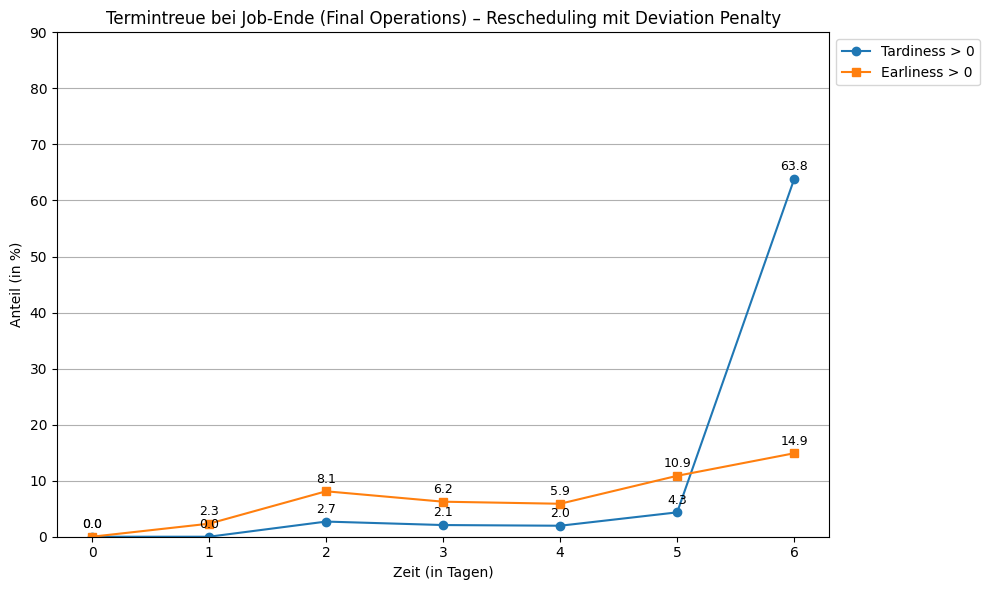

In [41]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 90
)

### b) Mit Deviation Penalty

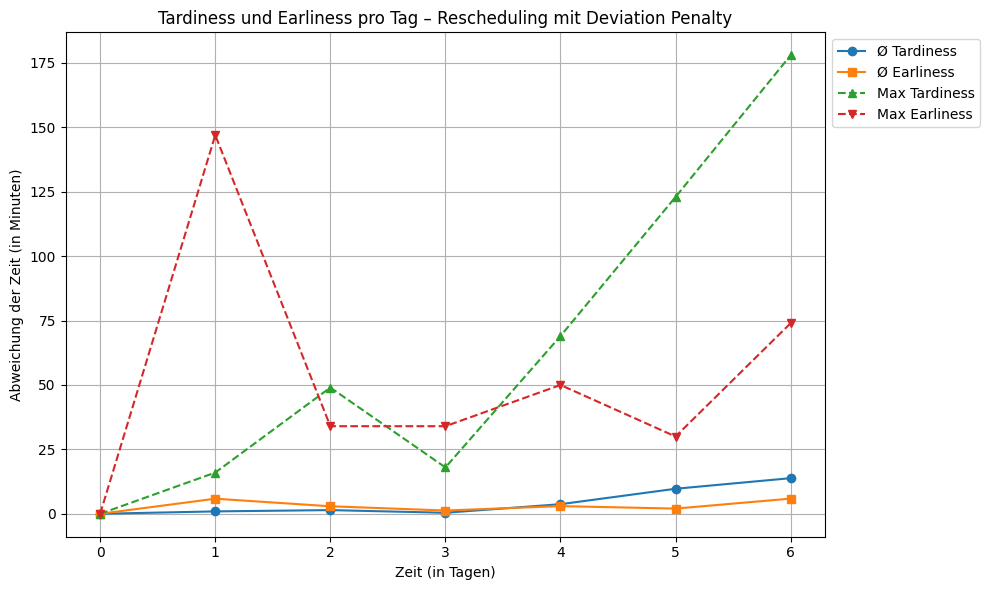

In [42]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


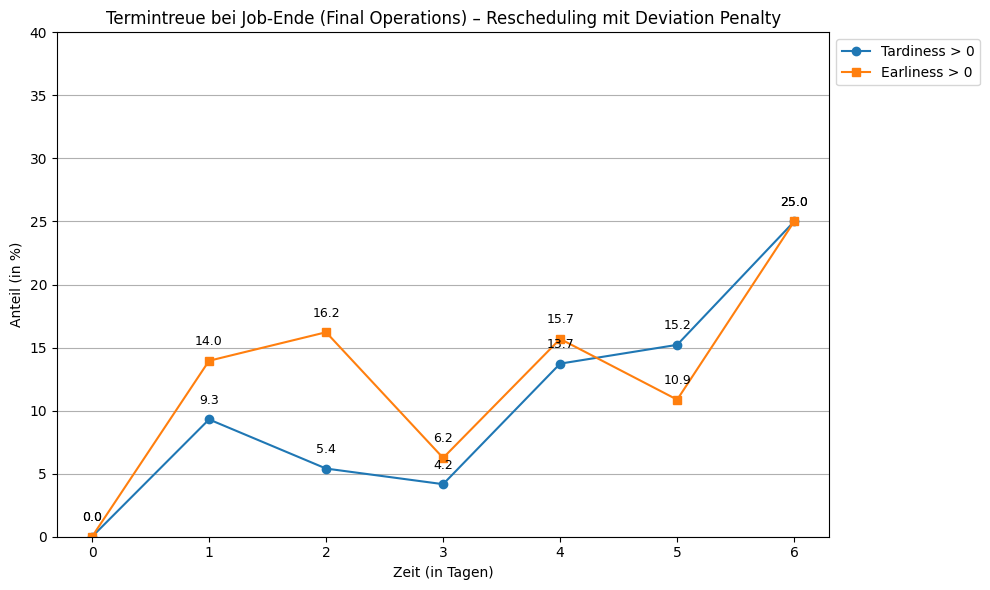

In [43]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

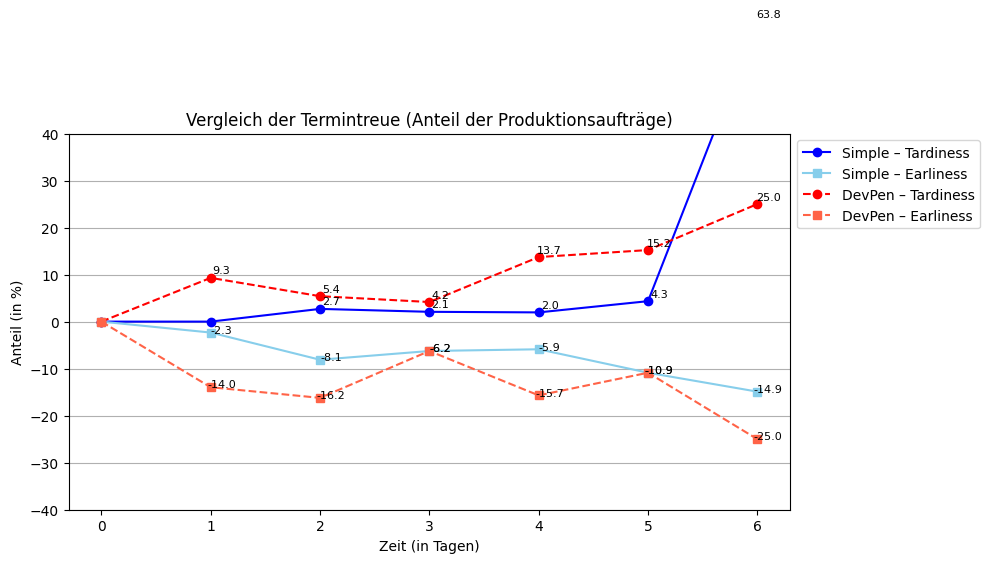

In [44]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-40,
    y_lim_max=40,
    as_percentage=True
)


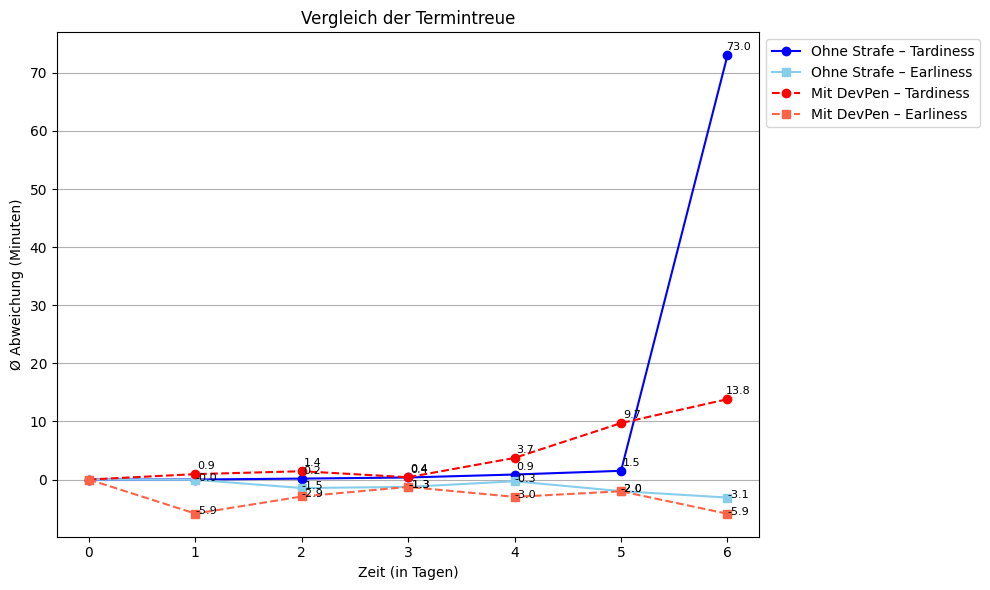

In [45]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

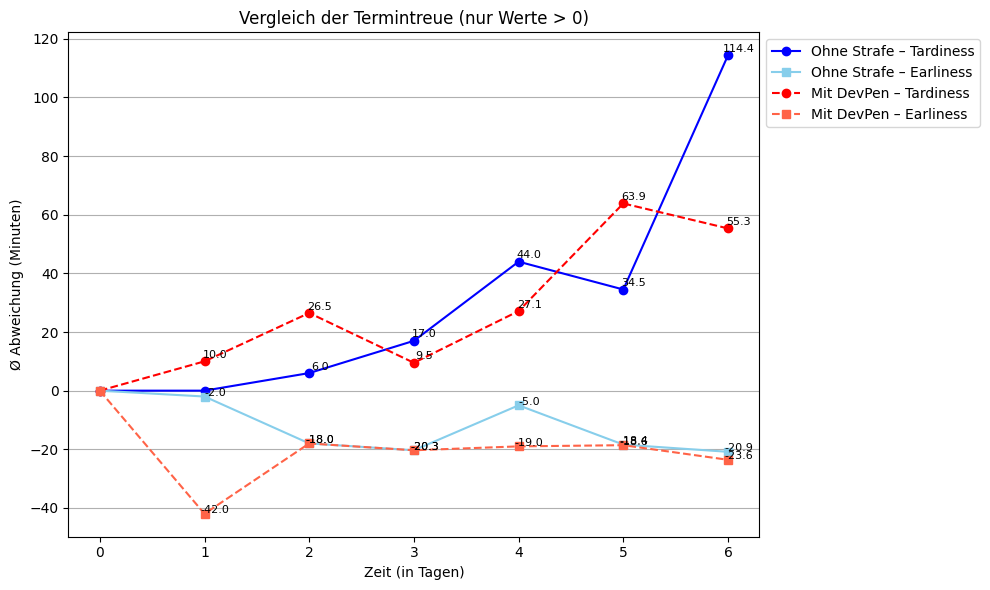

In [46]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

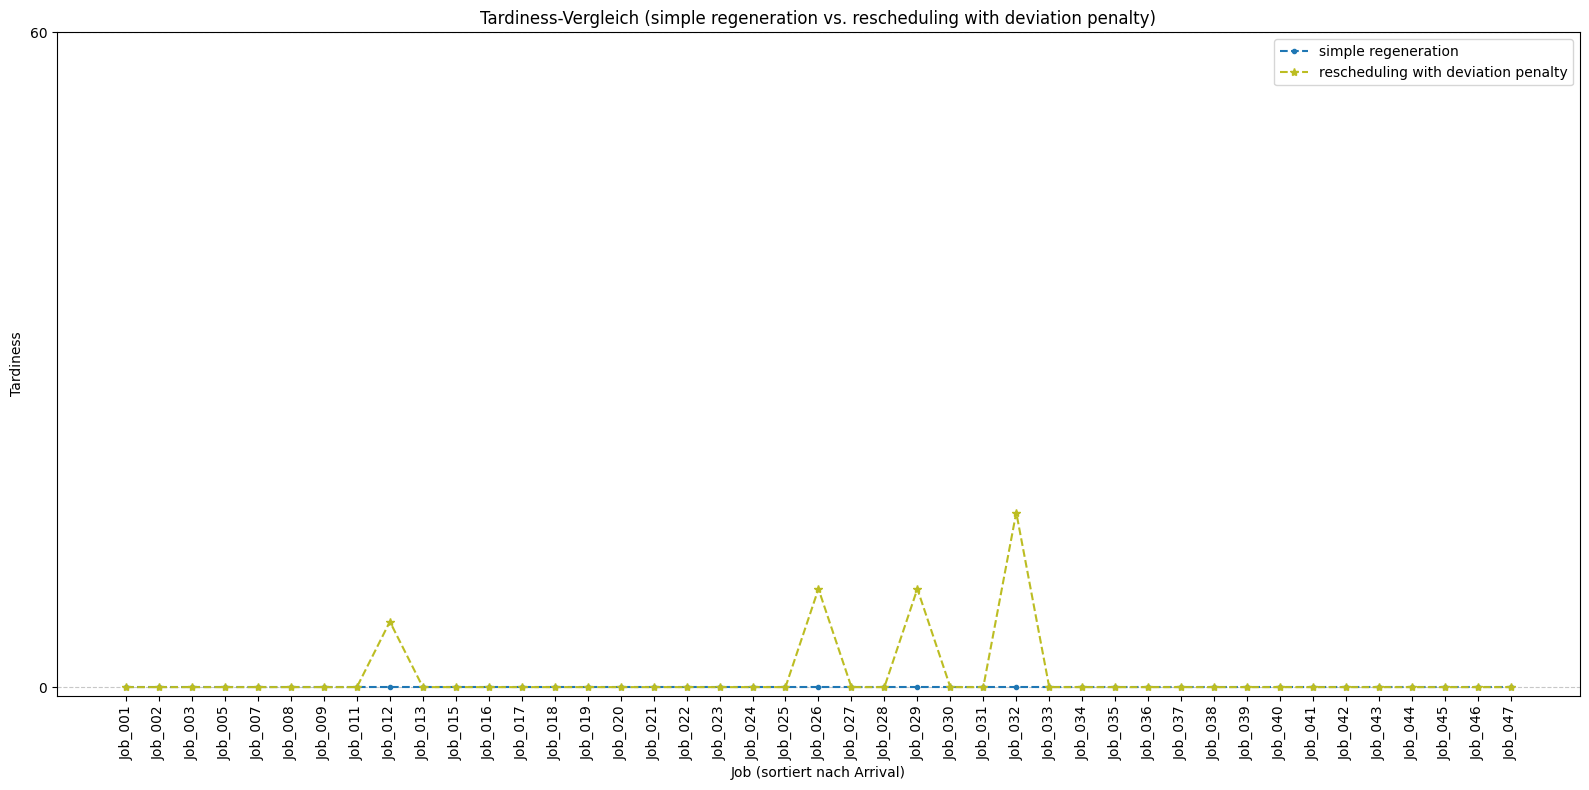

In [47]:
df_compare = proof.compare_and_plot_tardiness_single_day(
    df_plan_simple_last_ops_list[1],
    df_plan_devpen_last_ops_list[1],
    show_regression=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [48]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0,
 np.int64(20350),
 np.int64(11629),
 np.int64(8267),
 np.int64(32396),
 np.int64(14305),
 np.int64(33910)]

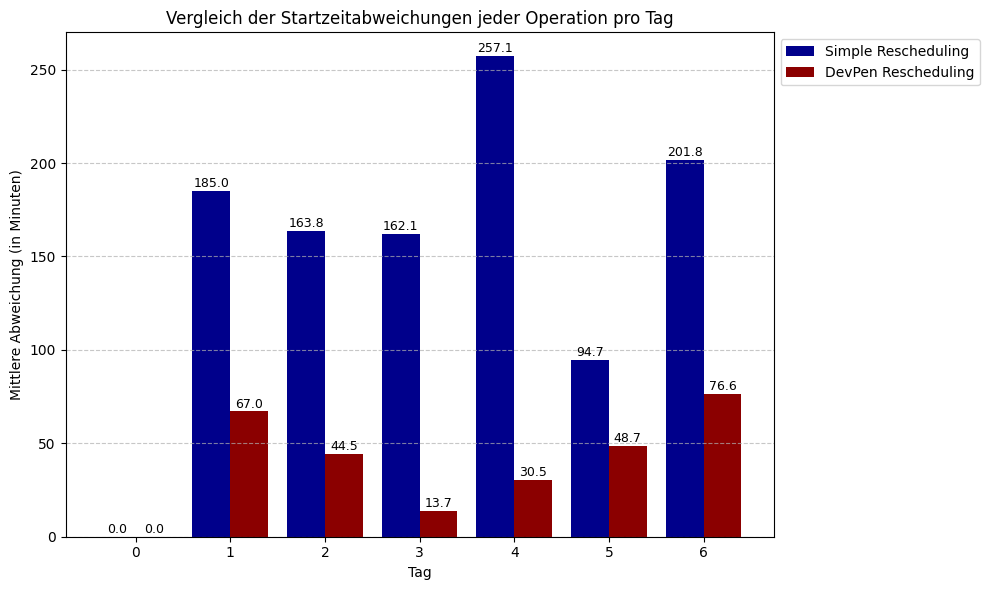

In [49]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [50]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

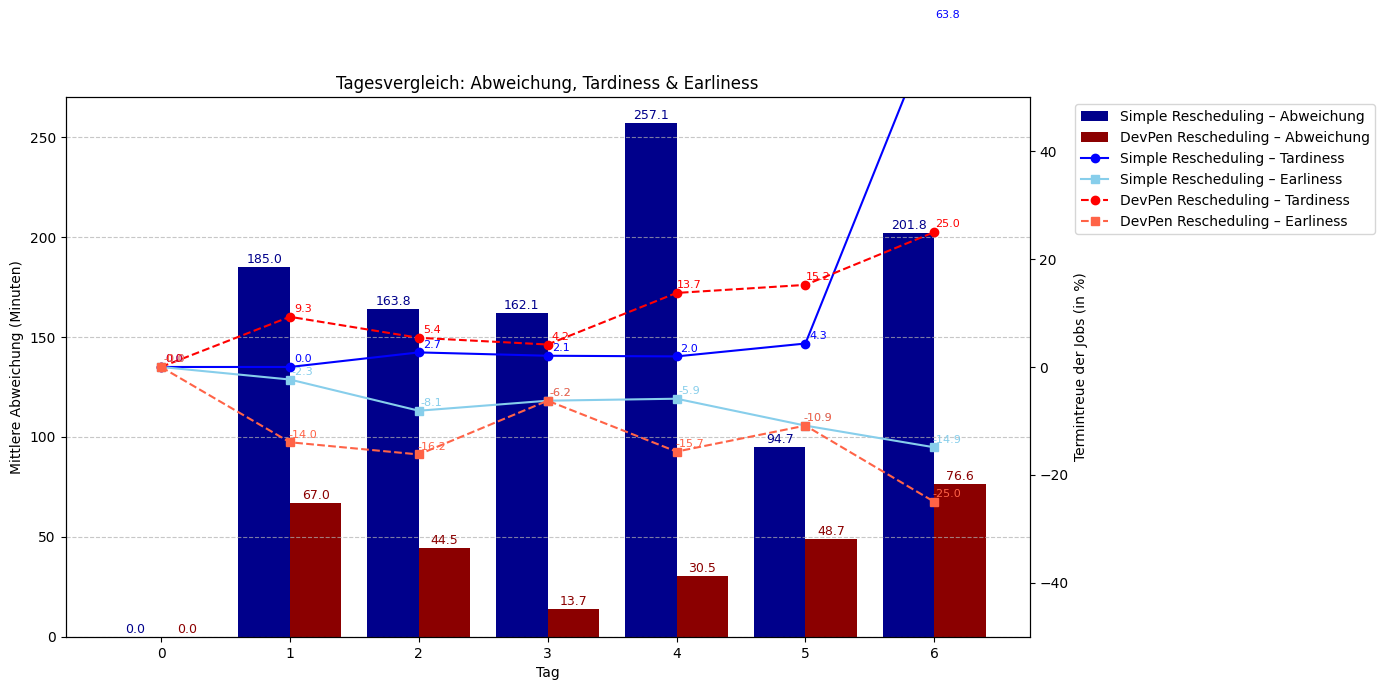

In [51]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=50
)


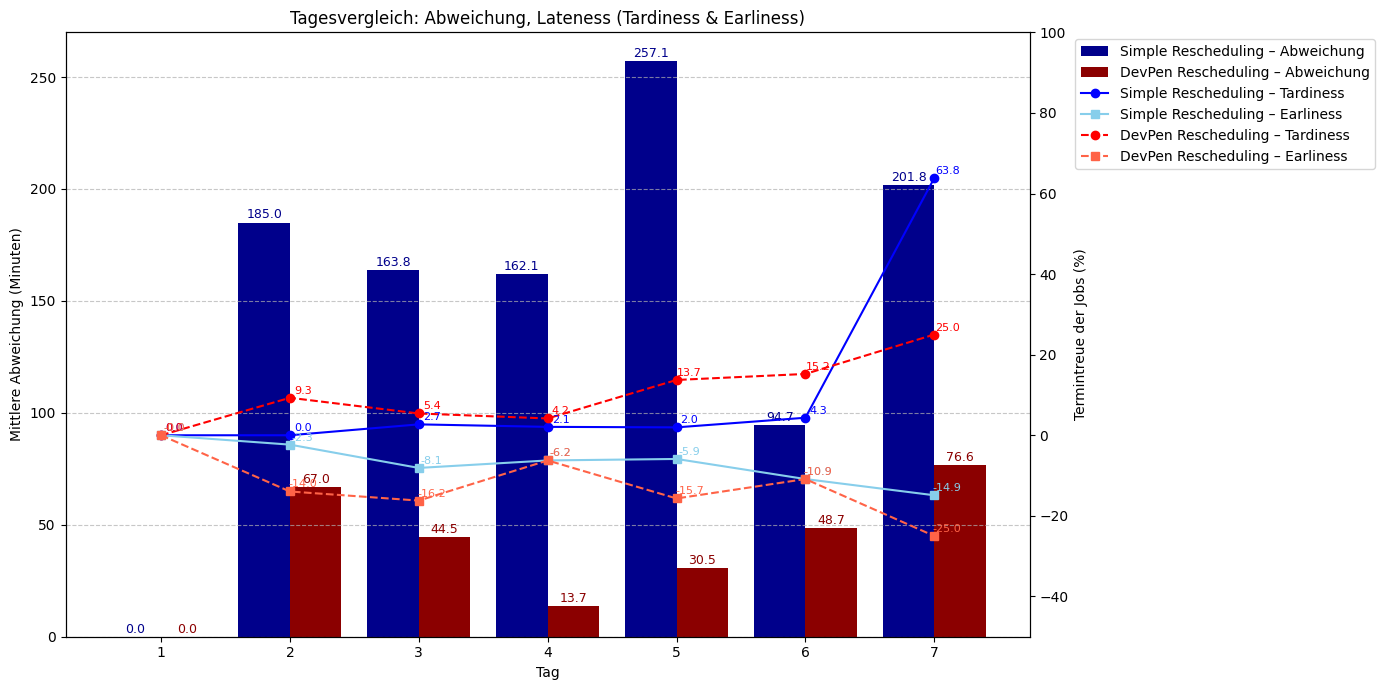

In [52]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs",
    y_right_lim_min = -50,
    y_right_lim_max = 100,
    as_percentage=True  # zeigt Tardiness/Earliness in Prozent
)


In [53]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

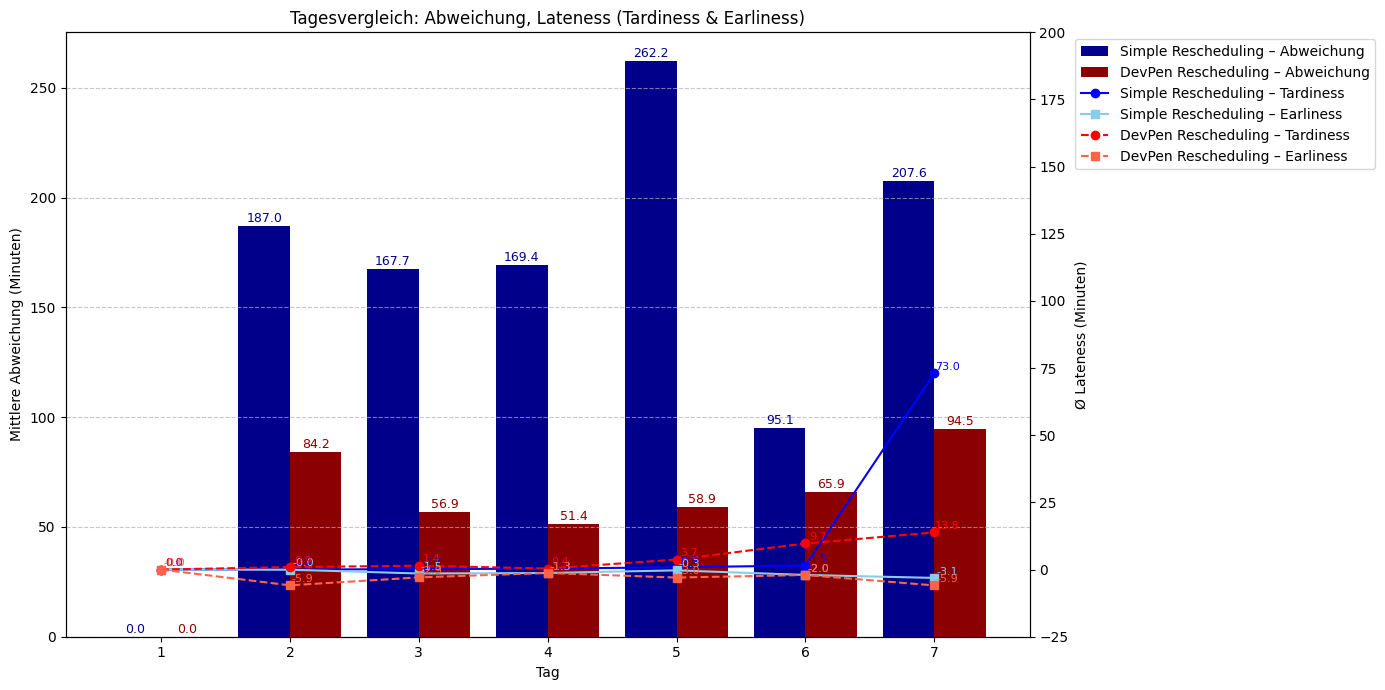

In [62]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -25,
    y_right_lim_max=200,
    as_percentage=False
)

In [55]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean", with_T1= False)
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean", with_T1= False)

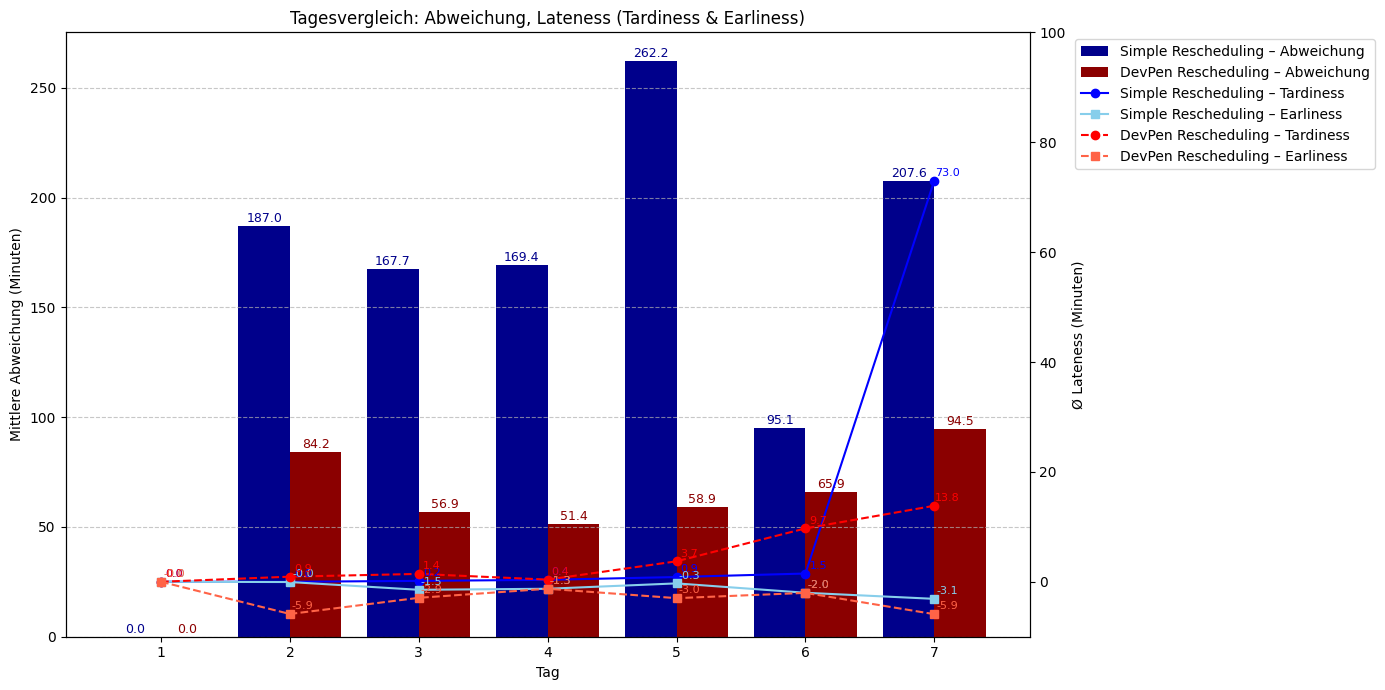

In [61]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -10,
    y_right_lim_max=100,
    as_percentage=False
)